In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def hoshen_kopelman_selection(a,b,c):
    if b==0 and a==0 :
        return [c,c+1,0]
    elif a!=0 and b!=0:
        key=min(a,b)
        return [key,c,1]
    else:
        key=max(a,b)
        return [key,c,2] 

In [3]:
start=timeit.default_timer()
#3 & 4
L=[10,100,200]
P=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
run=100
Q=[]
Q_infinity=[]
for l in L :
    for p in P :
        sum_Q=0
        sum_Qinf=0
        for i in range(run):
            lattice=np.zeros((l,l+1))
            for m in range(l):
                lattice[m][0]=1
            color=[0,1] #list of colours
            counter=2
            for c in range(1,l+1):
                for r in range(l):
                    a=np.random.rand() #a random number for probablity in each cell
                    if a<=p :
                        if r!=0 :#(the first row is checked in another section because of wall boundary conditions)
                            ans=hoshen_kopelman_selection(lattice[r-1][c],lattice[r][c-1],counter)
                            lattice[r][c]=ans[0]
                            counter=ans[1]
                            if ans[2]==0 :#if both cells are off
                                color.append(ans[0])
                            if ans[2]==1: #if both cells are on (checking values and assigning the min value to all the cells that have max value)
                                minvalue=int(min(color[int(lattice[r-1][c])],color[int(lattice[r][c-1])]))
                                maxvalue=int(max(color[int(lattice[r-1][c])],color[int(lattice[r][c-1])]))
                                color[maxvalue]=color[minvalue]
                        else:#for the first row in each column
                            if lattice[r][c-1]==0:#if the left neighbour is off then this cell will have value of the last 'on'cell
                                lattice[r][c]=counter
                                color.append(counter)#new colour appended
                                counter=counter+1
                            else:    
                                lattice[r][c]=lattice[r][c-1]#if the left neighbour is 'on' then the cell will take its value
                                
            for j in range(len(color)):
                color[j]=color[color[j]] # colour label =  colour number
            size=np.zeros(len(color)) #size of cluster
            for c in range(1,l+1):
                for r in range(l):
                    lattice[r][c]=color[int(lattice[r][c])] # number in each cell =  number of the colour that is assigned to all the cells with same colour
                    size[int(lattice[r][c])]=size[int(lattice[r][c])]+1 #adding each cell to size of cluster with same colour      
            for j in range(l):
                if lattice[j][l]==1: #all cells in the last column of lattice(checking if percolation has happened)
                    sum_Q=sum_Q+1 #how many times perculation has happened?(in all runs)
                    sum_Qinf=sum_Qinf+(size[1]/sum(size[1:])) #devided to number of all 'on' cells(cause we want the probablity that each cell could be in the infinie cluster)
                    break #if we have found just one cell with number'1' then we made sure we had percolation(no more need for counting in the last column)
        Q_infinity.append(sum_Qinf/run)    
        Q.append(sum_Q/run)
        
stop=timeit.default_timer()
print('creation time :',stop-start)   

creation time : 494.2234255000001


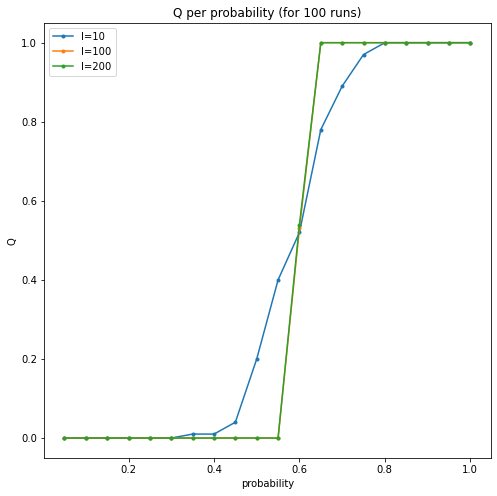

creation time : 0.45708700000000135


In [4]:
start=timeit.default_timer()
#3
fig = plt.figure(figsize=(8,8))
plt.plot(P, Q[0:20] ,'.-')#Q for l=10
plt.plot(P, Q[20:40], '.-')#Q for l=100
plt.plot(P, Q[40:60], '.-')#Q for l=200
plt.legend(('l=10', 'l=100', 'l=200'),loc='upper left')
plt.title('Q per probability (for 100 runs)')
plt.xlabel('probability')
plt.ylabel('Q')
plt.show()  
stop=timeit.default_timer()
print('creation time :',stop-start) 

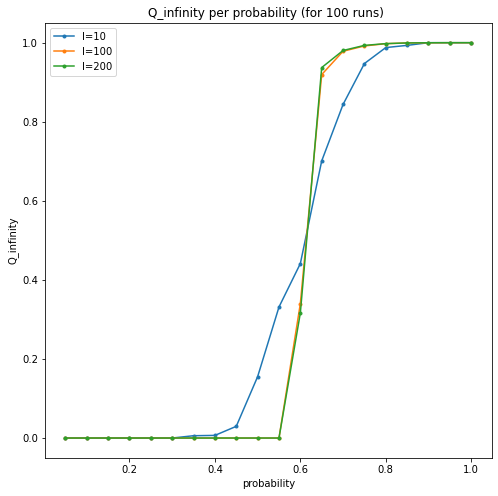

creation time : 0.36463629999980185


In [6]:
start=timeit.default_timer()
#4
fig = plt.figure(figsize=(8,8))
plt.plot(P, Q_infinity[0:20],'.-')#Q_infinity for l=10
plt.plot(P, Q_infinity[20:40],'.-')#Q_infinity for l=100
plt.plot(P, Q_infinity[40:60],'.-')#Q_infinity for l=200
plt.legend(('l=10', 'l=100', 'l=200'),loc='upper left')
plt.title('Q_infinity per probability (for 100 runs) ')
plt.xlabel('probability')
plt.ylabel('Q_infinity')
plt.show()
stop=timeit.default_timer()
print('creation time :',stop-start) 

In [7]:
start=timeit.default_timer()
#5
L_prime=[10,20,40,80,160] #different lattice sizes
P=[0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.75,0.8,0.85,0.9,0.95,1]
run=100
zhirasion_radius=[] #for all non-infinite clusters
for l in L_prime :
    for p in P :
        r_sum=0
        for i in range(run):
            lattice=np.zeros((l,l+1))
            for m in range(l):
                lattice[m][0]=1
            color=[0,1]#list of colours
            counter=2
            for c in range(1,l+1):
                for r in range(l):
                    a=np.random.rand() #a random number for probablity in each cell
                    if a<=p :
                        if r!=0 :#(the first row is checked in another section because of wall boundary conditions)
                            ans=hoshen_kopelman_selection(lattice[r-1][c],lattice[r][c-1],counter)
                            lattice[r][c]=ans[0]
                            counter=ans[1]
                            if ans[2]==0 :#if both cells are off
                                color.append(ans[0])
                            if ans[2]==1: #if both cells are on (checking values and assigning the min value to all the cells that have max value)
                                minvalue=int(min(color[int(lattice[r-1][c])],color[int(lattice[r][c-1])]))
                                maxvalue=int(max(color[int(lattice[r-1][c])],color[int(lattice[r][c-1])]))
                                color[maxvalue]=color[minvalue]
                                
                        else:#for the first row in each column (wall boundary conditions)
                            if lattice[r][c-1]==0:
                                lattice[r][c]=counter
                                color.append(counter)
                                counter=counter+1
                            else:    
                                lattice[r][c]=lattice[r][c-1]
                                
            for j in range(len(color)):
                color[j]=color[color[j]] #colour label =  colour number
            size=np.zeros(len(color)) #size of cluster   
            for c in range(1,l+1):
                for r in range(l):
                    lattice[r][c]=color[int(lattice[r][c])]#number in each cell =  number of the colour that is assigned to all the cells with same colour
                    size[int(lattice[r][c])]=size[int(lattice[r][c])]+1 #adding each cell to size of cluster with same colour 
            percolation=False       
            for m in range(l):
                if lattice[m][l]==1 :#all cells in the last column of lattice(checking if percolation has happened)
                    percolation=True #if we have found just one cell with number '1' then we made sure we had percolation
            v=1
            while v<1000:
                xx=np.random.randint(0,l)#all rows
                yy=np.random.randint(1,l)#ignoring the first column
                v=v+1
                if percolation: #if we have percolation we must assure that we are not counting the 'on' cells that are in the infinite cluster
                    if lattice[xx][yy]!=0 and lattice[xx][yy]!=1 : # !=1 --> the 'on' cells that are not in the infinite cluster
                        r_sum=r_sum+np.sqrt(size[int(lattice[xx][yy])]) #standard deviation for each cell in each cluster are  added to calculate radius of cluster
                        break       
                else :
                    if lattice[xx][yy]!=0 :#no percolation = no infinite cluster --> the only condition for cell is to be 'on'
                        r_sum=r_sum+np.sqrt(size[int(lattice[xx][yy])])
                        break
        zhirasion_radius.append(r_sum/run)   
        
stop=timeit.default_timer()
print('creation time :',stop-start)           

creation time : 454.9501686000003


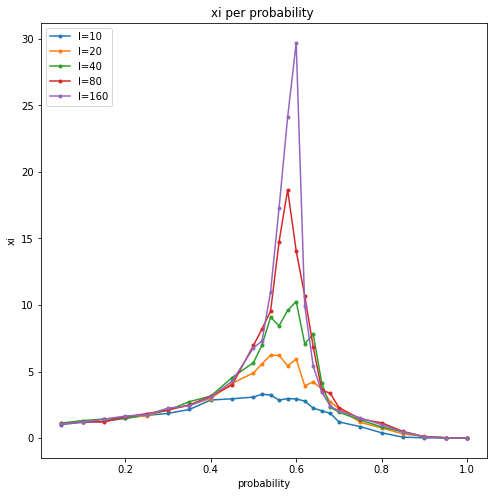

creation time : 0.5988700999987486


In [8]:
#correlation length ploting
#5
start=timeit.default_timer()
fig = plt.figure(figsize=(8,8))  
plt.plot(P,zhirasion_radius[0:26],'.-')   #zhirasion_radius for l=10
plt.plot(P,zhirasion_radius[26:52],'.-')  #zhirasion_radius for l=20
plt.plot(P,zhirasion_radius[52:78],'.-')  #zhirasion_radius for l=40
plt.plot(P,zhirasion_radius[78:104],'.-') #zhirasion_radius for l=80
plt.plot(P,zhirasion_radius[104:130],'.-')#zhirasion_radius for l=160
plt.title('xi per probability ')
plt.xlabel('probability')
plt.ylabel('xi')
plt.legend(('l=10','l=20','l=40', 'l=80', 'l=160'),loc='upper left')
plt.show()  
stop=timeit.default_timer()
print('creation time :',stop-start)  

In [9]:
#pc calculatig
start=timeit.default_timer()
Pc=[] #critical probablity
#the peak in the diagram of correlation length and probablity is the critical probablity
r1=zhirasion_radius.index(max(zhirasion_radius[0:26]))        #zhirasion_radius of largest cluster for l=10
r2=zhirasion_radius.index(max(zhirasion_radius[26:52]))-26    #zhirasion_radius of largest cluster for l=20
r3=zhirasion_radius.index(max(zhirasion_radius[52:78]))-52    #zhirasion_radius of largest cluster for l=40
r4=zhirasion_radius.index(max(zhirasion_radius[78:104]))-78   #zhirasion_radius of largest cluster for l=80
r5=zhirasion_radius.index(max(zhirasion_radius[104:130]))-104 #zhirasion_radius of largest cluster for l=160 
Pc.append(P[r1])#critical probablity for l=10
Pc.append(P[r2])#critical probablity for l=20
Pc.append(P[r3])#critical probablity for l=40
Pc.append(P[r4])#critical probablity for l=80
Pc.append(P[r5])#critical probablity for l=160
stop=timeit.default_timer()
print('creation time :',stop-start)  

creation time : 0.00030479999986710027


In [10]:
#critical probablity
Pc

[0.52, 0.54, 0.6, 0.58, 0.6]

In [11]:
#6
#calculating Pc - P_infinity
for i in range(len(Pc)):
    Pc[i]=abs(Pc[i]-0.61)# 0.61 is expected to be P_infinity
Pc_prime=np.array(Pc)#Pc - P_infinity
print(Pc_prime)

[0.09 0.07 0.01 0.03 0.01]


creation time : 0.015998200000467477


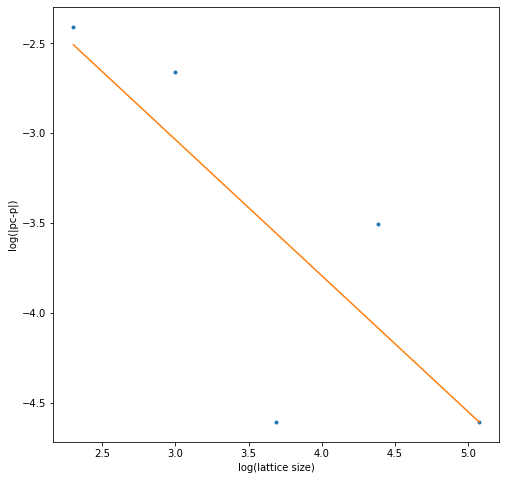

In [13]:
#nu ploting and calculating (log)
start=timeit.default_timer()
fig = plt.figure(figsize=(8,8)) 
l=np.array(L_prime)
p=np.array(Pc_prime)
l_prime=np.log(l)
p_prime=np.log(p)
plt.plot(l_prime,p_prime,'.')
plt.xlabel('log(lattice size)')
plt.ylabel('log(|pc-p|)')
z=np.polyfit(l_prime,p_prime,1) #fitting a line
a=[l_prime[0],l_prime[4]]
b=[l_prime[0]*z[0]+z[1],l_prime[4]*z[0]+z[1]]
plt.plot(a,b)
stop=timeit.default_timer()
print('creation time :',stop-start)  

In [14]:
z[0]

-0.7562242424221077

In [15]:
print('nu is',-1/z[0])

nu is 1.3223590886178203


In [16]:
zhirasion_radius

[1.013635965517494,
 1.182132071501207,
 1.2561507818803497,
 1.479141927334133,
 1.698203677700308,
 1.8543541175232392,
 2.1454917179067636,
 2.8577391781918777,
 2.9482246159230137,
 3.077017722753931,
 3.295424520244742,
 3.2320650910826974,
 2.8469204118577256,
 2.9671053998861554,
 2.9377797869247844,
 2.7788316299385007,
 2.2478533474256013,
 2.044516236431338,
 1.8530326079583597,
 1.2105701542380212,
 0.8583611114182551,
 0.3931104434594345,
 0.06414213562373094,
 0.02,
 0.0,
 0.0,
 1.0984474917977693,
 1.2044741201478089,
 1.4048889398245246,
 1.5727559244919944,
 1.6691468514007763,
 2.1277453704953704,
 2.46306380422464,
 2.970739001214417,
 4.116960389010126,
 4.892893074246496,
 5.583253836041074,
 6.228403311141634,
 6.20600477086526,
 5.433754729535765,
 5.937817841839663,
 3.9301364155083873,
 4.22150890599351,
 3.6710475690141497,
 2.7162599658394284,
 2.217293676731896,
 1.1789379900800674,
 0.762059017681179,
 0.30631545744180544,
 0.12732050807568876,
 0.0173205080